# Logistic Regression Project Exercise 

**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

**Complete the TASKs written in bold below.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease


----

**TASK: Run the cell below to read in the data.**

In [5]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\GUC_2350_65_55146_2025-04-15T16_09_04\\heart.csv")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


----
----

# Machine Learning

## Train | Test Split and Scaling

**TASK: Separate the features from the labels into 2 objects, X and y.**

In [9]:
X = df.drop('target',axis=1)
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**TASK: Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Create a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [19]:
scaler = StandardScaler()

In [21]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**TASK: Create a Logistic Regression model 

In [23]:
from sklearn.linear_model import LogisticRegression

In [25]:
log_model = LogisticRegression()

In [27]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [29]:
LogisticRegression()

LogisticRegression()

### Coeffecients

**TASK: Report back the model's coefficients.**

In [35]:
log_model.coef_

array([[-0.07244537, -0.73459575,  0.89371356, -0.26249543, -0.21218597,
         0.04596441,  0.12036576,  0.43326353, -0.42823456, -0.52722504,
         0.38098131, -0.85080651, -0.57468743]])

---------

## Model Performance Evaluation

**TASK: Let's now evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


In [43]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\user\anaconda31\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred = model.predict(X_test)


In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


In [54]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix Array:")
print(cm)

Confusion Matrix Array:
[[12  3]
 [ 2 14]]


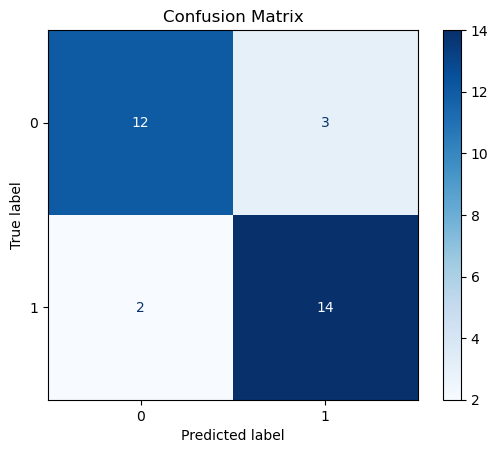

In [56]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [58]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

**TASK: Create the ROC Curve.**

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [62]:
y_proba = model.predict_proba(X_test)
y_scores = y_proba[:, 1]

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [66]:
roc_auc = auc(fpr, tpr)


In [68]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

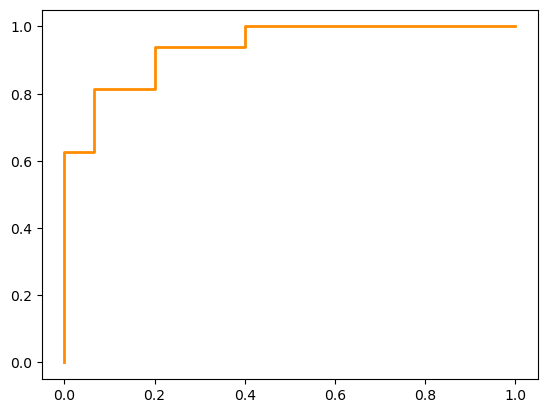

In [70]:
plt.plot(
    fpr,
    tpr,
    color='darkorange',
    lw=2,
    label=f'ROC Curve (AUC = {roc_auc:.2f})'
)

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [74]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [ ]:
# CODE HERE

In [76]:
# EXPECTED PREDICTION
prediction = log_model.predict(patient)
prediction[0]

0

----

## Great Job!